In [ ]:
# 분류 이미지 업로드

from google.colab import files
file_uploaded = files.upload()

Saving p_and_n_4.zip to p_and_n_4.zip


In [ ]:
# 이미지 압축 풀기

import os
import zipfile

local_zip = '/content/p_and_n_4.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# 경로 지정

# 기본 경로
base_dir = '/content/p_and_n_4'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_p_dir = os.path.join(train_dir, 'p')
train_n_dir = os.path.join(train_dir, 'n')
print(train_p_dir)
print(train_n_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_p_dir = os.path.join(validation_dir, 'p')
validation_n_dir = os.path.join(validation_dir, 'n')
print(validation_p_dir)
print(validation_n_dir)

/content/p_and_n_4/train/p
/content/p_and_n_4/train/n
/content/p_and_n_4/validation/p
/content/p_and_n_4/validation/n


In [ ]:
# 파일 확인

train_p_fnames = os.listdir( train_p_dir )
train_n_fnames = os.listdir( train_n_dir )

print(train_p_fnames[:5])
print(train_n_fnames[:5])

['╝╥│¬╣½.195_vertical_flip.jpg', '╝╥│¬╣½.281_horizonal_shift.jpg', '╝╥│¬╣½.212_zoom.jpg', '╝╥│¬╣½.290_zoom.jpg', '╝╥│¬╣½.276_zoom.jpg']
['└║╟α│¬╣½.104_zoom.jpg', '└║╟α│¬╣½.108_vertical_flip.jpg', '└║╟α│¬╣½.95.jpg', '└║╟α│¬╣½.6_horizonal_flip.jpg', '└║╟α│¬╣½.38_vertical_flip.jpg']


In [ ]:
# 파일 개수 확인

print('Total training p images :', len(os.listdir(train_p_dir)))
print('Total training n images :', len(os.listdir(train_n_dir)))

print('Total validation p images :', len(os.listdir(validation_p_dir)))
print('Total validation n images :', len(os.listdir(validation_n_dir)))

Total training p images : 2286
Total training n images : 1773
Total validation p images : 1152
Total validation n images : 882


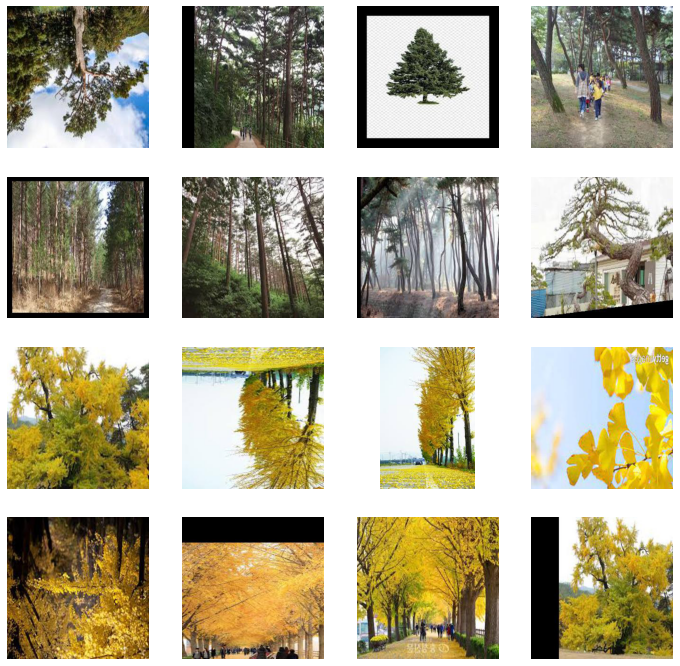

In [ ]:
# 이미지 확인

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_p_pix = [os.path.join(train_p_dir, fname)
                for fname in train_p_fnames[ pic_index-8:pic_index]]

next_n_pix = [os.path.join(train_n_dir, fname)
                for fname in train_n_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_p_pix+next_n_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# 모델 구성

import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
# 모델 컴파일

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 이미지 데이터 전처리

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 4059 images belonging to 2 classes.
Found 2034 images belonging to 2 classes.


In [ ]:
# 모델 훈련

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 38s - loss: 0.2818 - accuracy: 0.9055 - val_loss: 0.1184 - val_accuracy: 0.9460
Epoch 2/100
100/100 - 6s - loss: 0.1339 - accuracy: 0.9590 - val_loss: 0.0903 - val_accuracy: 0.9650
Epoch 3/100
100/100 - 6s - loss: 0.0759 - accuracy: 0.9735 - val_loss: 0.1429 - val_accuracy: 0.9610
Epoch 4/100
100/100 - 6s - loss: 0.1049 - accuracy: 0.9735 - val_loss: 0.1336 - val_accuracy: 0.9500
Epoch 5/100
100/100 - 6s - loss: 0.0657 - accuracy: 0.9835 - val_loss: 0.1051 - val_accuracy: 0.9650
Epoch 6/100
100/100 - 6s - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.1061 - val_accuracy: 0.9700
Epoch 7/100
100/100 - 7s - loss: 0.0754 - accuracy: 0.9850 - val_loss: 0.2536 - val_accuracy: 0.9570
Epoch 8/100
100/100 - 6s - loss: 0.0728 - accuracy: 0.9845 - val_loss: 0.1324 - val_accuracy: 0.9750
Epoch 9/100
100/100 - 6s - loss: 0.0522 - accuracy: 0.9865 - val_loss: 0.3412 - val_accuracy: 0.9550
Epoch 10/100
100/100 - 6s - loss: 0.0549 - accuracy: 0.9885 - val_loss: 0.1531 - val_accur

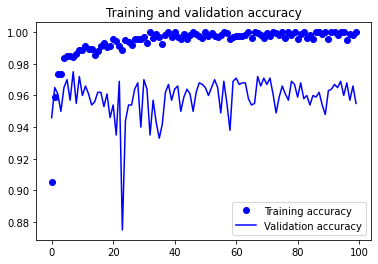

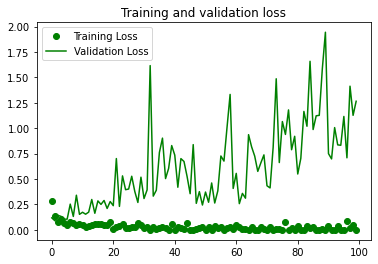

In [ ]:
# 정확도와 손실 확인

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving n1.jpg to n1.jpg
[0.]
n1.jpg is a n


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving n2.jpg to n2.jpg
[0.]
n2.jpg is a n


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving n3.jpg to n3.jpg
[0.]
n3.jpg is a n


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving n4.jpg to n4.jpg
[0.]
n4.jpg is a n


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving n5.jpg to n5.jpg
[0.]
n5.jpg is a n


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving p1.jpg to p1.jpg
[1.]
p1.jpg is a p


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving p2.jpg to p2.jpg
[1.]
p2.jpg is a p


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving p3.jpg to p3.jpg
[1.]
p3.jpg is a p


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving p4.jpg to p4.jpg
[1.]
p4.jpg is a p


In [ ]:
# 테스트 이미지 분류

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a p")
  else:
    print(fn + " is a n")

Saving p5.jpg to p5.jpg
[1.]
p5.jpg is a p
